In [3]:
from rhessys import utilities as rut

In [4]:
header = ['date','year','doy','dor','solar_rad','wind_speed', 'wind_dir','wind_gust_speed','Tave','Tmax','Tmin','RHave','RHmax','RHmin','P']

In [12]:
pth = './data/coyote_raws/coyote_raws.txt'
coyote = pd.read_table(pth, delim_whitespace=True, skiprows=6, names=header, na_values=-9999)
coyote.index = pd.DatetimeIndex(coyote.date)

pth = './data/tower_raws/tower_raws.txt'
tower = pd.read_table(pth, delim_whitespace=True, skiprows=6, names=header, na_values=-9999)
tower.index = pd.DatetimeIndex(tower.date)

pth = './data/cuba_raws/cuba_raws.txt'
cuba = pd.read_table(pth, delim_whitespace=True, skiprows=6, names=header, na_values=-9999)
cuba.index = pd.DatetimeIndex(cuba.date)

In [34]:
# do a little QA/QC

for df in [cuba,coyote,tower]:
    df.loc[df.P>70,'P'] = np.NaN

(0, 200)

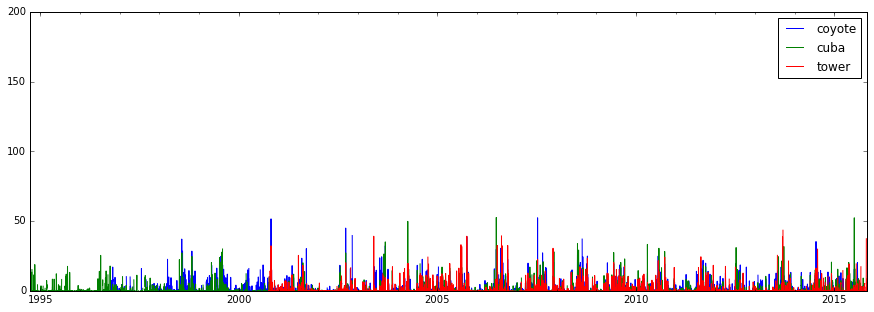

In [31]:
plt.figure(figsize=(15,5))
coyote.P.plot(label='coyote')
cuba.P.plot(label='cuba')
tower.P.plot(label='tower')
plt.legend()
plt.ylim(0,200)

In [33]:
coyote.to_pickle('./data/coyote_raws.pcl')
cuba.to_pickle('./data/cuba_raws.pcl')
tower.to_pickle('./data/tower_raws.pcl')